In [6]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [8]:
#importação das planilhas csv para serem dataframes
df100 = pd.read_csv("dataset_sudeste_realista_outliers-100.csv")

In [9]:
df100.columns.tolist() #listar colunas de tabela de 100 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [10]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df100['idade'] = df100['idade'].fillna(0)
df100['renda'] = df100['renda'].fillna(0)
df100['cidade'] = df100['cidade'].fillna(0)
df100['categoria'] = df100['categoria'].fillna(0)
df100['nota'] = df100['nota'].fillna(0)
df100['feedback'] = df100['feedback'].fillna(0)

In [11]:
#feedbackisualização de tabela tratada de 100 linhas
display(df100.head(100))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,57.0,22701.87,Rio de Janeiro,A,6.8,Bom
1,2,45.0,3820.44,Belo Horizonte,B,5.6,Bom
2,3,31.0,5606.17,Belo Horizonte,A,9.1,Bom
3,4,70.0,16354.61,Belo Horizonte,A,6.5,Bom
4,5,68.0,9418.66,Belo Horizonte,A,6.5,Bom
...,...,...,...,...,...,...,...
95,96,37.0,29868.68,São Paulo,A,8.2,Bom
96,97,54.0,13883.32,São Paulo,B,8.9,Bom
97,98,41.0,39972.51,Vitória,A,8.3,Bom
98,99,16.0,15611.64,Belo Horizonte,A,7.6,Bom


In [12]:
# Média, mínimo, máximo, quartis, margem de erro, contagem

print("\n### Descrição Estatística 100###")
print(df100.describe())


### Descrição Estatística 100###
               id       idade         renda        nota
count  100.000000  100.000000    100.000000  100.000000
mean    50.500000   42.440000  23898.598900    7.127000
std     29.011492   19.715307  12341.523723    1.759468
min      1.000000    0.000000      0.000000    0.000000
25%     25.750000   29.500000  14078.680000    5.800000
50%     50.500000   40.500000  24566.290000    7.100000
75%     75.250000   58.250000  33915.855000    8.400000
max    100.000000   80.000000  46099.970000    9.900000


In [13]:
# Cálculos Estatísticos de idade

media_idade100 = sum(df100['idade'])/len(df100['idade'])
mediana_idade100 = df100['idade'].median()
desvio_padrao_idade100 = df100['idade'].std()
maximo_idade100 = df100['idade'].max()
minimo_idade100 = df100['idade'].min()

print('Média de Idade - 100 Elementos:',round(media_idade100,0))
print('Mediana de Idade - 100 Elementos:',round(mediana_idade100,0))
print('Desvio Padrão de Idade - 100 Elementos:',round(desvio_padrao_idade100,0))
print('Maior Valor de Idade - 100 Elementos:',round(maximo_idade100,0))
print('Menor Valor de Idade - 100 Elementos:',round(minimo_idade100,0))

Média de Idade - 100 Elementos: 42.0
Mediana de Idade - 100 Elementos: 40.0
Desvio Padrão de Idade - 100 Elementos: 20.0
Maior Valor de Idade - 100 Elementos: 80.0
Menor Valor de Idade - 100 Elementos: 0.0


In [14]:
# Cálculos Estatísticos de renda

media_renda100 = sum(df100['renda'])/len(df100['renda'])
mediana_renda100 = df100['renda'].median()
desvio_padrao_renda100 = df100['renda'].std()
maximo_renda100 = df100['renda'].max()
minimo_renda100 = df100['renda'].min()

print('Média de Renda - 100 Elementos:',round(media_renda100,2))
print('Mediana de Renda - 100 Elementos:',round(mediana_renda100,2))
print('Desvio Padrão de Renda - 100 Elementos:',round(desvio_padrao_renda100,2))
print('Maior Valor de Renda - 100 Elementos:',round(maximo_renda100,2))
print('Menor Valor de Renda - 100 Elementos:',round(minimo_renda100,2))

Média de Renda - 100 Elementos: 23898.6
Mediana de Renda - 100 Elementos: 24566.29
Desvio Padrão de Renda - 100 Elementos: 12341.52
Maior Valor de Renda - 100 Elementos: 46099.97
Menor Valor de Renda - 100 Elementos: 0.0


In [15]:
# Cálculos Estatísticos de nota

media_nota100 = sum(df100['nota'])/len(df100['nota'])
mediana_nota100 = df100['nota'].median()
desvio_padrao_nota100 = df100['nota'].std()
maximo_nota100 = df100['nota'].max()
minimo_nota100 = df100['nota'].min()

print('Média de Nota - 100 Elementos:',round(media_nota100,2))
print('Mediana de Nota - 100 Elementos:',round(mediana_nota100,2))
print('Desvio Padrão de Nota - 100 Elementos:',round(desvio_padrao_nota100,2))
print('Maior Valor de Nota - 100 Elementos:',round(maximo_nota100,2))
print('Menor Valor de Nota - 100 Elementos:',round(minimo_nota100,2))

Média de Nota - 100 Elementos: 7.13
Mediana de Nota - 100 Elementos: 7.1
Desvio Padrão de Nota - 100 Elementos: 1.76
Maior Valor de Nota - 100 Elementos: 9.9
Menor Valor de Nota - 100 Elementos: 0.0


In [16]:
#Calculando o IQR e identificando os limites - Renda

Q1_renda100 = df100['renda'].quantile(0.25)
Q3_renda100 = df100['renda'].quantile(0.75)
IQR_renda100 = Q3_renda100 - Q1_renda100
limite_inferior_renda100 = Q1_renda100 - 1.5 * IQR_renda100
limite_superior_renda100 = Q3_renda100 + 1.5 * IQR_renda100

print (f"\n\n\t IQR - Campo Renda - 100\n\n")
print(f"Quartis -> Q1: {Q1_renda100:-8.2f}  ->  Q3: {Q3_renda100:-8.2f}")
print(f"IQR ----- {IQR_renda100}")
print(f"Limites - Inf: {limite_inferior_renda100:-8.2f}  -> Sup: {limite_superior_renda100:-8.2f}")



	 IQR - Campo Renda - 100


Quartis -> Q1: 14078.68  ->  Q3: 33915.85
IQR ----- 19837.174999999996
Limites - Inf: -15677.08  -> Sup: 63671.62


In [17]:
#Calculando o IQR e identificando os limites - Idade

Q1_idade100 = df100['idade'].quantile(0.25)
Q3_idade100 = df100['idade'].quantile(0.75)
IQR_idade100 = Q3_idade100 - Q1_idade100
limite_inferior_idade100 = Q1_idade100 - 1.5 * IQR_idade100
limite_superior_idade100 = Q3_idade100 + 1.5 * IQR_idade100

print (f"\n\n\t IQR - Campo Idade - 100\n\n")
print(f"Quartis -> Q1: {Q1_idade100:-8.2f}  ->  Q3: {Q3_idade100:-8.2f}")
print(f"IQR ----- {IQR_idade100}")
print(f"Limites - Inf: {limite_inferior_idade100:-8.2f}  -> Sup: {limite_superior_idade100:-8.2f}")



	 IQR - Campo Idade - 100


Quartis -> Q1:    29.50  ->  Q3:    58.25
IQR ----- 28.75
Limites - Inf:   -13.62  -> Sup:   101.38


In [18]:
#Calculando o IQR e identificando os limites - Nota

Q1_nota100 = df100['nota'].quantile(0.25)
Q3_nota100 = df100['nota'].quantile(0.75)
IQR_nota100 = Q3_nota100 - Q1_nota100
limite_inferior_nota100 = Q1_nota100 - 1.5 * IQR_nota100
limite_superior_nota100 = Q3_nota100 + 1.5 * IQR_nota100

print (f"\n\n\t IQR - Campo Nota - 100\n\n")
print(f"Quartis -> Q1: {Q1_nota100:-8.2f}  ->  Q3: {Q3_nota100:-8.2f}")
print(f"IQR ----- {IQR_nota100}")
print(f"Limites - Inf: {limite_inferior_nota100:-8.2f}  -> Sup: {limite_superior_nota100:-8.2f}")



	 IQR - Campo Nota - 100


Quartis -> Q1:     5.80  ->  Q3:     8.40
IQR ----- 2.6000000000000005
Limites - Inf:     1.90  -> Sup:    12.30


In [19]:
#Outliers Renda

outliers_renda100 = df100[(df100['renda'] < limite_inferior_renda100) | (df100['renda'] > limite_superior_renda100)]
print(f"\n### Possíveis Outliers em 'renda' - 100 Elementos###\n\n{outliers_renda100}\n\n\n")


### Possíveis Outliers em 'renda' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [20]:
#Outliers Idade

outliers_idade100 = df100[(df100['idade'] < limite_inferior_idade100) | (df100['idade'] > limite_superior_idade100)]
print(f"\n### Possíveis Outliers em 'idade' - 100 Elementos###\n\n{outliers_idade100}\n\n\n")


### Possíveis Outliers em 'idade' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [21]:
#Outliers Nota

outliers_nota100 = df100[(df100['nota'] < limite_inferior_nota100) | (df100['nota'] > limite_superior_nota100)]
print(f"\n### Possíveis Outliers em 'nota' - 100 Elementos###\n\n{outliers_nota100}\n\n\n")


### Possíveis Outliers em 'nota' - 100 Elementos###

    id  idade     renda     cidade categoria  nota feedback
29  30   40.0  41768.46    Vitória         A   0.0        0
50  51   48.0   7812.34  São Paulo         A   0.0        0





In [27]:
#Conversão da planilha tratada para csv
df100.to_csv('Realista100_Tratado.csv', index=False)

In [28]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo100 = df100.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Realista100.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo100, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!


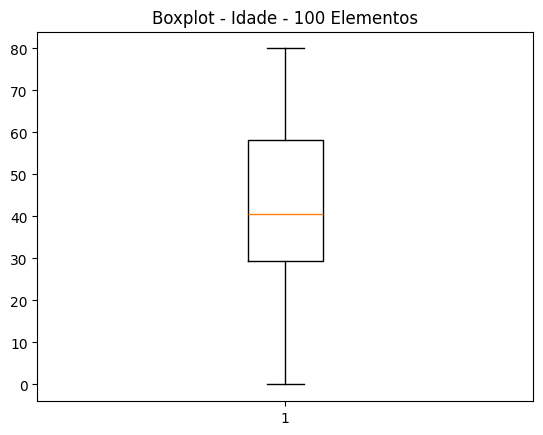

In [24]:
#Geração Gráfico - Idade - 100 linhas
plt.boxplot(df100['idade'])
plt.title("Boxplot - Idade - 100 Elementos")
plt.show()

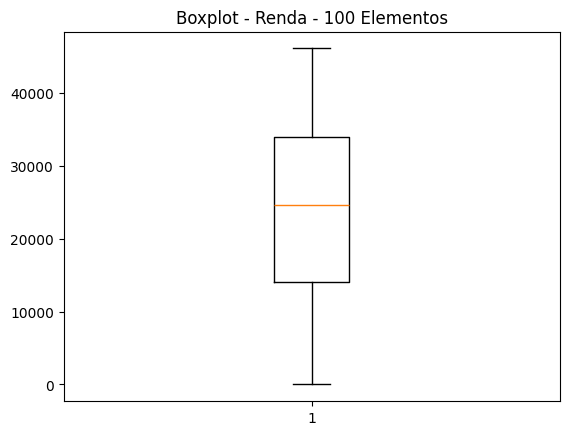

In [25]:
#Geração Gráfico - Renda - 100 linhas
plt.boxplot(df100['renda'])
plt.title("Boxplot - Renda - 100 Elementos")
plt.show()

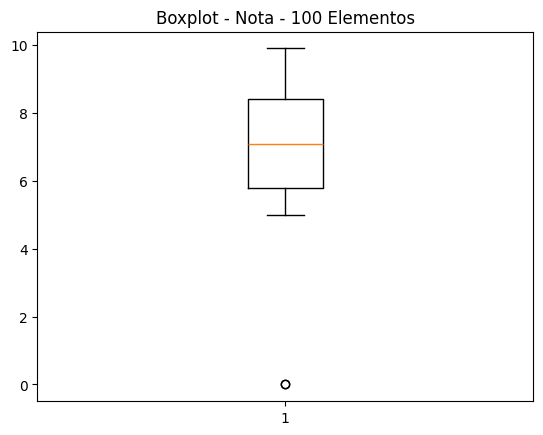

In [26]:
#Geração Gráfico - Nota - 100 linhas
plt.boxplot(df100['nota'])
plt.title("Boxplot - Nota - 100 Elementos")
plt.show()